# Problem 2a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
import helper_functions
import copy
from typing import List

# Load data
input_file = "network_backup_dataset.csv"
df = pd.read_csv(input_file)

df_features = df[['Week #', 'Day of Week',
                  'Backup Start Time - Hour of Day',
                  'Work-Flow-ID', 'File Name']]
df_labels = df['Size of Backup (GB)']

# Convert features and lables into numpy array
features = df_features.as_matrix()
labels = df_labels.as_matrix()

# Convert string values to int values
# Numeraical encoding of weekday, work_flow_id, and file name
# hour of day and week # are already numerical values
vfunc = np.vectorize(helper_functions.weekday_to_num)
features[:, 1] = vfunc(features[:, 1])
vfunc = np.vectorize(helper_functions.work_flow_id_to_num)
features[:, 3] = vfunc(features[:, 3])
vfunc = np.vectorize(helper_functions.filename_to_num)
features[:, 4] = vfunc(features[:, 4])


C:\Users\zhuta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# all the functions for 2a
def scalarencoding(index, data):
    if index == indices[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif index == indices[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif index == indices[4]:
        for i,j in zip(files,range(len(files))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data

def plot_result(target, predict):
    x = range(len(predict))
    
    area = np.pi * (1)**2  # 0 to 15 point radii
    plt.scatter(x, predict, color = 'red', s=area, label='prediction')
    plt.scatter(x, target, color = 'blue', s=area, label='True Value')
    plt.title("fitted values against true values")
    plt.legend()
    plt.show()
    
    plt.scatter(x, predict, color = 'red',s=area, label='prediction')
    plt.scatter(x, target - predict, color = 'blue', s=area, label='Residuals')
    plt.title("residuals versus fitted values")
    plt.legend()
    plt.show()


ONE_HOT = True
SCALAR = False

def all_encoding_masks(n_features):
    results = []
    mask = [ONE_HOT] * n_features
    helper(0, mask, results)
    return results


def helper(start, mask, mask_list):
    mask_list.append(copy.deepcopy(mask))
    i = start
    while i < len(mask):
        mask[i] = SCALAR
        helper(i + 1, mask, mask_list)
        mask[i] = ONE_HOT
        i = i + 1

def avg_rmse(features):
    kf = KFold(n_splits=10, random_state=0, shuffle=True)

    train_mse_list = []
    test_mse_list = []


    for train_index, test_index in kf.split(features):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
    
        linearregression.fit(X_train, y_train)
    
        # Compute mse for training set
        y_train_pred = linearregression.predict(X_train)
        train_mse_list.append(mean_squared_error(y_train, y_train_pred))
    
        # Compute mse for test set
        y_test_pred = linearregression.predict(X_test)
        test_mse_list.append(mean_squared_error(y_test, y_test_pred))
    
    avg_train_rmse = np.sqrt(np.mean(train_mse_list))
    avg_test_rmse = np.sqrt(np.mean(test_mse_list))

    print ('Training RMSE is', avg_train_rmse)
    print ('Test RMSE is', avg_test_rmse)

# i 

In [3]:

linearregression = LinearRegression()

avg_rmse(features)

Training RMSE is 0.103587856885
Test RMSE is 0.103627896737


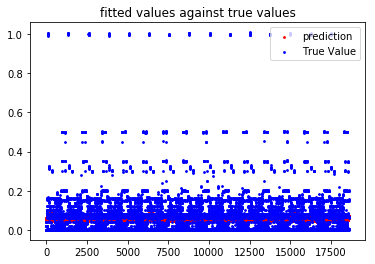

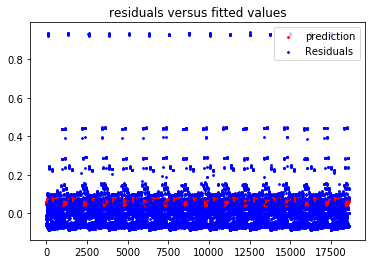

In [5]:
predicted = cross_val_predict(linearregression, features, labels, cv = 10)

plot_result (labels, predicted)

# (ii) standardize

C:\Users\zhuta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Training RMSE is 0.103587856885
Test RMSE is 0.103627896737


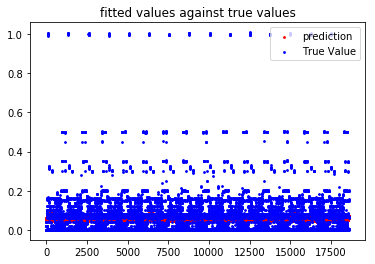

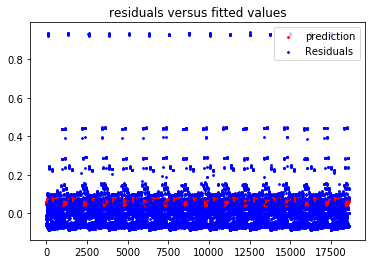

In [9]:

scaler = StandardScaler(copy = False, with_mean=False, with_std=True)
scaler.fit(features)
features_standardized = scaler.transform(features)
avg_rmse(features_standardized)

predicted_standardized = cross_val_predict(linearregression, features_standardized, labels, cv = 10)

plot_result (labels, predicted_standardized)


# (iii) using f regression and mutual information regression measure to determine 3 most important features

In [14]:

best_fregression = SelectKBest(f_regression, k=3)  #using selectkbest two select 3 most important variables
best_fregression_fitted = best_fregression.fit_transform(features_standardized,labels)
print("f_regression: " + str(best_fregression.get_support()))


f_regression: [False  True  True  True False]


Training RMSE is 0.103588792478
Test RMSE is 0.103611218666


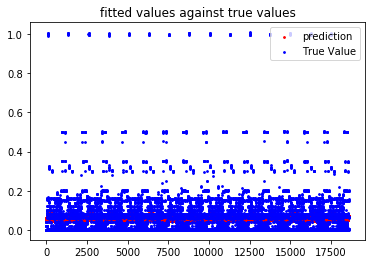

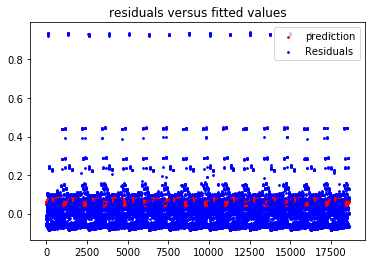

In [8]:
# Thus we select  Day of Week, Backup Start Time - Hour of Day, Work-Flow-ID as our 3 most important features

features_fregression = features_standardized[:,1:4]
avg_rmse(features_fregression)

predicted_fregression = cross_val_predict(linearregression, features_fregression, labels, cv = 10)

plot_result (labels, predicted_fregression)

In [17]:
best_mir = SelectKBest(mutual_info_regression, k=3)  #using selectkbest two select 3 most important variables
best_mir_fitted = best_mir.fit_transform(features_standardized,labels)
print(" mutual_info_regression: " + str(best_mir.get_support()))

 mutual_info_regression: [False False  True  True  True]


Training RMSE is 0.103697228859
Test RMSE is 0.103720626763


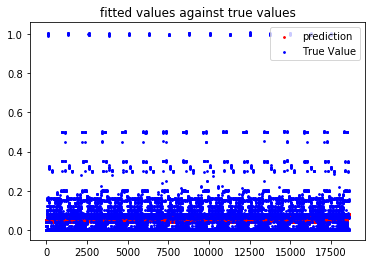

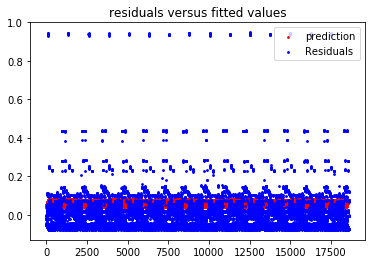

In [10]:
# Thus we select Backup Start Time - Hour of Day, Work-Flow-ID, File Name as our 3 most important features
features_mir = features_standardized[:,2:5]
avg_rmse(features_mir)


predicted_mir = cross_val_predict(linearregression, features_mir, labels, cv = 10)

plot_result (labels, predicted_mir)

# (iv) Applying 32 combinations 

In [19]:

kf = KFold(n_splits=10, random_state=0, shuffle=True)

mask_list = all_encoding_masks(5)

avg_train_rmse = []
avg_test_rmse = []

for mask in mask_list:
    enc = OneHotEncoder(categorical_features=mask, sparse=False)
    encoded_features = enc.fit_transform(features)
    
    train_mse_list = []
    test_mse_list = []

    # Perform linear regression
    for train_index, test_index in kf.split(encoded_features):
        X_train, X_test = encoded_features[train_index], encoded_features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        linearregression.fit(X_train, y_train)

        # Compute mse for training set
        y_train_pred = linearregression.predict(X_train)
        train_mse_list.append(mean_squared_error(y_train, y_train_pred))

        # Compute mse for test set
        y_test_pred = linearregression.predict(X_test)
        test_mse_list.append(mean_squared_error(y_test, y_test_pred))

    avg_train_rmse.append(np.sqrt(np.mean(train_mse_list)))
    avg_test_rmse.append(np.sqrt(np.mean(test_mse_list)))


In [22]:
print (mask_list[16])

[False, True, True, True, False]


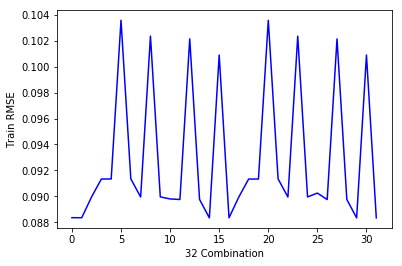

In [23]:
plt.figure()
plt.plot(range(0,len(avg_train_rmse)),avg_train_rmse, color = 'blue', label = 'Train RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Train RMSE')
plt.show()

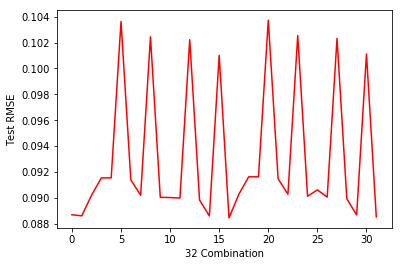

In [24]:
plt.figure()
plt.plot(range(0,len(avg_test_rmse)),avg_test_rmse, color = 'red', label = 'Test RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Test RMSE')
plt.show()

In [20]:
print (avg_train_rmse)
print (avg_test_rmse)

[0.088350033229920036, 0.088345433403484316, 0.089949398288239238, 0.091335346446430848, 0.091335148315303677, 0.10358785688545552, 0.091344223729349305, 0.089946228445639098, 0.10236174932859557, 0.089954787533918681, 0.089795473497471801, 0.089751920353005693, 0.10215018581773144, 0.08975889667101529, 0.088333682081962836, 0.10090327007275081, 0.088340896889768872, 0.089946498878188813, 0.09133236449615563, 0.09133134166902851, 0.10358349821383288, 0.091340043276389823, 0.089941636806100983, 0.10235712265017191, 0.089950626172803097, 0.090249169912603053, 0.089750311657207343, 0.10214804155006828, 0.089756508991091916, 0.088331351829880139, 0.10090061286862086, 0.088338269223304663]
[0.088684715423578642, 0.088600321298543672, 0.090196082589475798, 0.091536108253037388, 0.091536504422881179, 0.1036278967366156, 0.09138685373424893, 0.090192510079847715, 0.10244970466132744, 0.090033705053452498, 0.090016171876337814, 0.089976263278906496, 0.10221988970281136, 0.089827280569240039, 0.

In [25]:
print ('Best Performance Combination:', np.argmin(avg_test_rmse))

Best Performance Combination: 16


In [26]:
# Using the best model to calculate training & test RMSE and plotting

avg_train_rmse = []
avg_test_rmse = []

enc = OneHotEncoder(categorical_features=mask_list[16], sparse=False)
encoded_features_16 = enc.fit_transform(features)

avg_rmse(encoded_features_16)

Training RMSE is 0.0883408968898
Test RMSE is 0.0884395342254


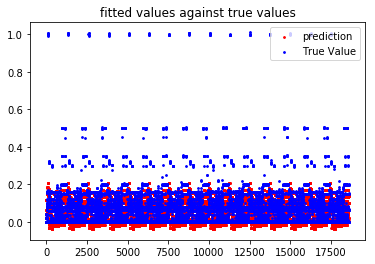

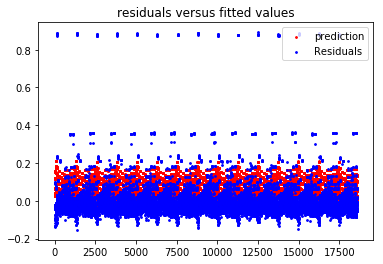

In [27]:
predicted_best_comb = cross_val_predict(linearregression, encoded_features_16, labels, cv = 10)

plot_result (labels, predicted_best_comb)

# v. Controlling ill-conditioning and over-fiting

In [66]:
# Ridge Model
from sklearn.linear_model import RidgeCV

alphalist = [100, 10, 1, 0.1, 0.01, 0.001]
ridge = RidgeCV(normalize=True, alphas=alphalist, cv=10)

kf = KFold(n_splits=10, random_state=0, shuffle=True)

mask_list = all_encoding_masks(5)

avg_train_rmse = []
avg_test_rmse = []
optimal_alpha = []
optimal_coefficients = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    ridge.fit(X_train, y_train)

    # Compute mse for training set
    y_train_pred = ridge.predict(X_train)
    train_mse_list.append(mean_squared_error(y_train, y_train_pred))

    # Compute mse for test set
    y_test_pred = ridge.predict(X_test)
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))

avg_train_rmse.append(np.sqrt(np.mean(train_mse_list)))
avg_test_rmse.append(np.sqrt(np.mean(test_mse_list)))
optimal_alpha.append(ridge.alpha_)
optimal_coefficients.append(ridge.coef_)  


In [67]:
for mask in mask_list:
    enc = OneHotEncoder(categorical_features=mask, sparse=False)
    encoded_features = enc.fit_transform(features)
    
    train_mse_list = []
    test_mse_list = []

    # Perform linear regression
    for train_index, test_index in kf.split(encoded_features):
        X_train, X_test = encoded_features[train_index], encoded_features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        ridge.fit(X_train, y_train)

        # Compute mse for training set
        y_train_pred = ridge.predict(X_train)
        train_mse_list.append(mean_squared_error(y_train, y_train_pred))

        # Compute mse for test set
        y_test_pred = ridge.predict(X_test)
        test_mse_list.append(mean_squared_error(y_test, y_test_pred))

    avg_train_rmse.append(np.sqrt(np.mean(train_mse_list)))
    avg_test_rmse.append(np.sqrt(np.mean(test_mse_list)))
    optimal_alpha.append(ridge.alpha_)
    optimal_coefficients.append(ridge.coef_)
        
print ('Best Combination Index:', np.argmin(avg_test_rmse))
print ('Optimal Alpha', optimal_alpha[np.argmin(avg_test_rmse)])
print ('Optimal Coefficients \n', optimal_coefficients[np.argmin(avg_test_rmse)])

Best Combination Index: 17
Optimal Alpha 0.001
Optimal Coefficients 
 [  4.01350066e-02  -1.28814112e-02  -2.00696523e-02  -5.55062586e-03
  -5.45763609e-03   2.97438087e-03   1.33123719e-03  -2.02387157e-02
  -2.14722877e-02   7.65400832e-03   3.35264915e-02  -2.23979290e-03
   2.24732228e-03   3.90865010e-02  -1.30613609e-02  -4.06695895e-02
  -5.69478212e-02   7.20127555e-02   4.07057142e-05   4.51866938e-05]


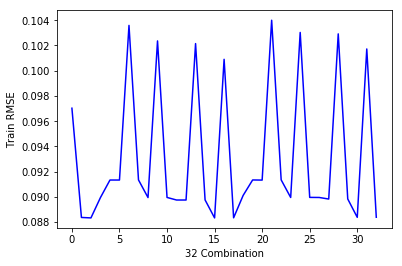

In [68]:
plt.figure()
plt.plot(range(0,len(avg_train_rmse)),avg_train_rmse, color = 'blue', label = 'Train RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Train RMSE')
plt.show()

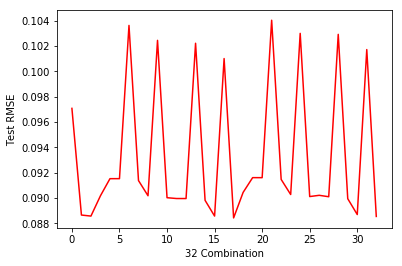

In [69]:
plt.figure()
plt.plot(range(0,len(avg_test_rmse)),avg_test_rmse, color = 'red', label = 'Test RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Test RMSE')
plt.show()

In [70]:
print (avg_train_rmse)
print (avg_test_rmse)

[0.097028100361510231, 0.088368613141054819, 0.088332426018386256, 0.089945838522022148, 0.091335461571283083, 0.091335163843071415, 0.10359243922961793, 0.091344322627578384, 0.089945457913673338, 0.10236198221278699, 0.089954996394483802, 0.089750482489161315, 0.089750281669714341, 0.1021504144463639, 0.089758908826180331, 0.088331924436338499, 0.10090364470621713, 0.088340815393676553, 0.090112200190032396, 0.091341431042866156, 0.091330366747077132, 0.10400137415353852, 0.091347398831185728, 0.089952450996360581, 0.10303412182632715, 0.089958880196465807, 0.089952528444940991, 0.08982805843467799, 0.10292017207416095, 0.08983331500209063, 0.088378043496674635, 0.10172468465285057, 0.088384517722830847]
[0.097080350632657825, 0.088666199043232391, 0.088584242512333683, 0.090186518151862599, 0.091535069550903791, 0.091536338155438254, 0.1036233510628457, 0.091386694305435834, 0.090188041057954318, 0.10244550502115556, 0.090033964004230749, 0.089969199797471935, 0.089968060819185541, 

In [76]:
# for best alpha, pick the value from the list 
print ('Training RMSE is 0.088340815393676553')
print ('Test RMSE is 0.088439524898406036')

Training RMSE is 0.088340815393676553
Test RMSE is 0.088439524898406036


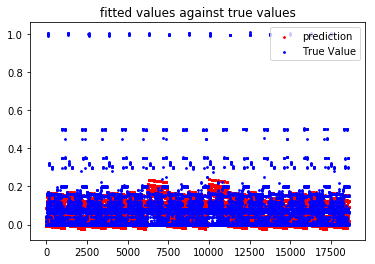

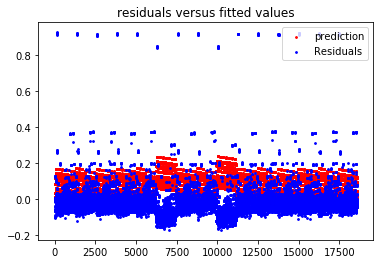

In [77]:
predicted_ridge = cross_val_predict(ridge, encoded_features_17, labels, cv = 10)

plot_result (labels, predicted_ridge)

In [78]:
# Lasso

from sklearn.linear_model import LassoCV
alphalist = [100, 10, 1, 0.1, 0.01, 0.001]
lasso = LassoCV(normalize=True, alphas=alphalist, cv=10)

kf = KFold(n_splits=10, random_state=0, shuffle=True)

mask_list = all_encoding_masks(5)

avg_train_rmse = []
avg_test_rmse = []
optimal_alpha = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    lasso.fit(X_train, y_train)

    # Compute mse for training set
    y_train_pred = lasso.predict(X_train)
    train_mse_list.append(mean_squared_error(y_train, y_train_pred))

    # Compute mse for test set
    y_test_pred = lasso.predict(X_test)
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))

avg_train_rmse.append(np.sqrt(np.mean(train_mse_list)))
avg_test_rmse.append(np.sqrt(np.mean(test_mse_list)))
optimal_alpha.append(lasso.alpha_)
optimal_coefficients.append(lasso.coef_)

In [79]:
for mask in mask_list:
    enc = OneHotEncoder(categorical_features=mask, sparse=False)
    encoded_features = enc.fit_transform(features)
    
    train_mse_list = []
    test_mse_list = []

    # Perform linear regression
    for train_index, test_index in kf.split(encoded_features):
        X_train, X_test = encoded_features[train_index], encoded_features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        lasso.fit(X_train, y_train)

        # Compute mse for training set
        y_train_pred = lasso.predict(X_train)
        train_mse_list.append(mean_squared_error(y_train, y_train_pred))

        # Compute mse for test set
        y_test_pred = lasso.predict(X_test)
        test_mse_list.append(mean_squared_error(y_test, y_test_pred))

    avg_train_rmse.append(np.sqrt(np.mean(train_mse_list)))
    avg_test_rmse.append(np.sqrt(np.mean(test_mse_list)))
    optimal_alpha.append(lasso.alpha_)
    optimal_coefficients.append(lasso.coef_)
        
print ('Best Combination Index:', np.argmin(avg_test_rmse))
print ('Optimal Alpha', optimal_alpha[np.argmin(avg_test_rmse)])
print ('Optimal Coefficients \n', optimal_coefficients[np.argmin(avg_test_rmse)])

Best Combination Index: 0
Optimal Alpha 100.0
Optimal Coefficients 
 [  6.01259676e-05  -2.29689838e-03   1.26966630e-03   1.40598425e-03
   1.62594379e-04]


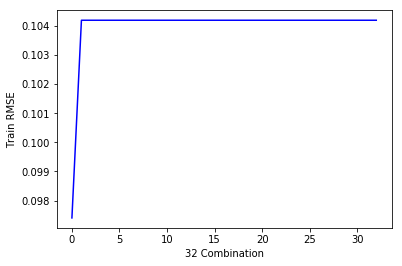

In [80]:
plt.figure()
plt.plot(range(0,len(avg_train_rmse)),avg_train_rmse, color = 'blue', label = 'Train RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Train RMSE')
plt.show()

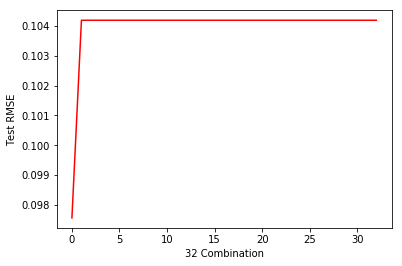

In [81]:
plt.figure()
plt.plot(range(0,len(avg_test_rmse)),avg_test_rmse, color = 'red', label = 'Test RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Test RMSE')
plt.show()

In [82]:
print (avg_train_rmse)
print (avg_test_rmse)

[0.097405472897829318, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455, 0.1041894604929455]
[0.097564694637076552, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235, 0.10419304869145235,

In [83]:
# for best alpha
print ('Training RMSE is 0.097405472897829318')
print ('Test RMSE is 0.097564694637076552')

Training RMSE is 0.097405472897829318
Test RMSE is 0.097564694637076552


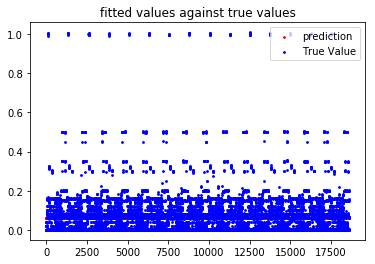

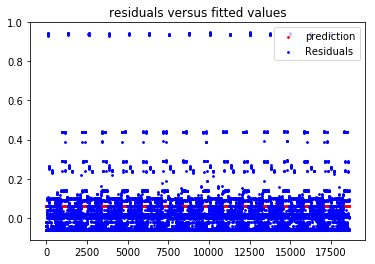

In [84]:
predicted_lasso = cross_val_predict(lasso, encoded_features_0, labels, cv = 10)

plot_result (labels, predicted_lasso)

In [86]:
# Elastic Net

from sklearn.linear_model import ElasticNetCV
l1_ratio_list = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 1]
elasticnet = ElasticNetCV(normalize=True,  l1_ratio=l1_ratio_list, cv=10, tol=0.01)

kf = KFold(n_splits=10, random_state=0, shuffle=True)

mask_list = all_encoding_masks(5)

avg_train_rmse = []
avg_test_rmse = []
optimal_l1_ratio = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    elasticnet.fit(X_train, y_train)

    # Compute mse for training set
    y_train_pred = elasticnet.predict(X_train)
    train_mse_list.append(mean_squared_error(y_train, y_train_pred))

    # Compute mse for test set
    y_test_pred = elasticnet.predict(X_test)
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))

avg_train_rmse.append(np.sqrt(np.mean(train_mse_list)))
avg_test_rmse.append(np.sqrt(np.mean(test_mse_list)))
optimal_l1_ratio.append(elasticnet.l1_ratio_)
optimal_coefficients.append(elasticnet.coef_)

In [88]:
for mask in mask_list:
    enc = OneHotEncoder(categorical_features=mask, sparse=False)
    encoded_features = enc.fit_transform(features)
    
    train_mse_list = []
    test_mse_list = []

    # Perform linear regression
    for train_index, test_index in kf.split(encoded_features):
        X_train, X_test = encoded_features[train_index], encoded_features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        elasticnet.fit(X_train, y_train)

        # Compute mse for training set
        y_train_pred = elasticnet.predict(X_train)
        train_mse_list.append(mean_squared_error(y_train, y_train_pred))

        # Compute mse for test set
        y_test_pred = elasticnet.predict(X_test)
        test_mse_list.append(mean_squared_error(y_test, y_test_pred))

    avg_train_rmse.append(np.sqrt(np.mean(train_mse_list)))
    avg_test_rmse.append(np.sqrt(np.mean(test_mse_list)))
    optimal_l1_ratio.append(elasticnet.l1_ratio_)
    optimal_coefficients.append(elasticnet.coef_)
        
print ('Best Combination Index:', np.argmin(avg_test_rmse))
print ('Optimal l1_ratio', optimal_l1_ratio[np.argmin(avg_test_rmse)])
print ('Optimal Coefficients \n', optimal_coefficients[np.argmin(avg_test_rmse)])

Best Combination Index: 17
Optimal l1_ratio 0.9
Optimal Coefficients 
 [  4.01350066e-02  -1.28814112e-02  -2.00696523e-02  -5.55062586e-03
  -5.45763609e-03   2.97438087e-03   1.33123719e-03  -2.02387157e-02
  -2.14722877e-02   7.65400832e-03   3.35264915e-02  -2.23979290e-03
   2.24732228e-03   3.90865010e-02  -1.30613609e-02  -4.06695895e-02
  -5.69478212e-02   7.20127555e-02   4.07057142e-05   4.51866938e-05]


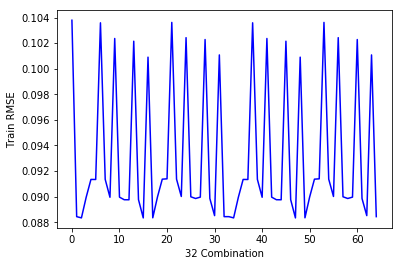

In [89]:
plt.figure()
plt.plot(range(0,len(avg_train_rmse)),avg_train_rmse, color = 'blue', label = 'Train RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Train RMSE')
plt.show()

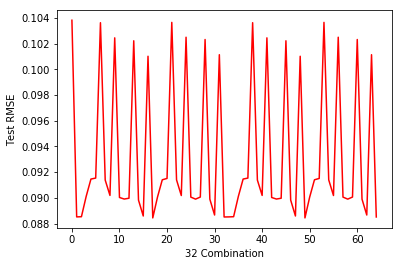

In [90]:
plt.figure()
plt.plot(range(0,len(avg_test_rmse)),avg_test_rmse, color = 'red', label = 'Test RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Test RMSE')
plt.show()

In [91]:
print (avg_train_rmse)
print (avg_test_rmse)

[0.10379051793038808, 0.088431926221973087, 0.08833608768839471, 0.089952174755168382, 0.091342218254068352, 0.091337830598237649, 0.10359044762300827, 0.091347406657613053, 0.089947905633590119, 0.10236407021077087, 0.089957749829131059, 0.089755175092840797, 0.089751674044711183, 0.10215101274103927, 0.089759646454426648, 0.088333103585539391, 0.10090407153281981, 0.08834148219380436, 0.089986171459755529, 0.09136329621727779, 0.091389823502061762, 0.1036211901754856, 0.091363418034724239, 0.090010361364941338, 0.10242876089096872, 0.089986531869372249, 0.089851706539399639, 0.089959739292026317, 0.10228262746196823, 0.089851966977584241, 0.088512681014949843, 0.10107926612102743, 0.088432546174055673, 0.088431926221973087, 0.08833608768839471, 0.089952174755168382, 0.091342218254068352, 0.091337830598237649, 0.10359044762300827, 0.091347406657613053, 0.089947905633590119, 0.10236407021077087, 0.089957749829131059, 0.089755175092840797, 0.089751674044711183, 0.10215101274103927, 0.08

In [92]:
# for best l1 ratio

print ('Training RMSE is 0.08834148219380436')
print ('Test RMSE is 0.088434712608448429')

Training RMSE is 0.08834148219380436
Test RMSE is 0.088434712608448429


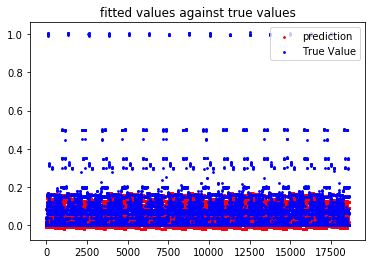

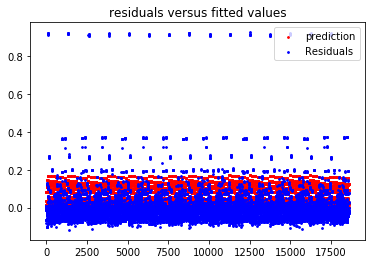

In [94]:
predicted_elasticnet = cross_val_predict(elasticnet, encoded_features_17, labels, cv = 10)

plot_result (labels, predicted_elasticnet)